In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [14]:
import pandas as pd
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/drug.csv")
print(data.shape)
data

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [15]:
data.isnull().sum().sum()

0

# Managing features

In [16]:
txt_to_numeric0 = {
        "M" : 1,
        "F" : 0
}

data["Sex"] = data["Sex"].map(txt_to_numeric0)

In [17]:
txt_to_numeric1 = {
        "HIGH" : 2,
        "NORMAL" : 1,
        "LOW" : 0

}

data["BP"] = data["BP"].map(txt_to_numeric1)

In [18]:
txt_to_numeric2={
        "HIGH" : 1,
        "NORMAL" : 0

}
data['Cholesterol'] = data['Cholesterol'].map(txt_to_numeric2)

In [19]:
txt_to_numeric3={
        'DrugY': 4,
        'drugX': 3,
        'drugA': 0,
        'drugC': 2,
        'drugB': 1

}
data['Drug'] = data['Drug'].map(txt_to_numeric3)

In [20]:
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
5,22,0,1,1,8.607,3
6,49,0,1,1,16.275,4
7,41,1,0,1,11.037,2
8,60,1,1,1,15.171,4
9,43,1,0,0,19.368,4


# **checking Correlation**

In [21]:
data.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,-0.120918,0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.044952,0.008811,-0.125008,-0.098573
BP,-0.120918,-0.044952,1.000000,-0.032208,0.036871,-0.328665
Cholesterol,0.068234,0.008811,-0.032208,1.000000,-0.010000,-0.055629
Na_to_K,-0.063119,-0.125008,0.036871,-0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,-0.328665,-0.055629,0.589120,1.000000


In [22]:
X = data.drop('Drug' , axis = 1)
Y = data["Drug"]

# **Label counts**

Drug
0    23
1    16
2    16
3    54
4    91
dtype: int64


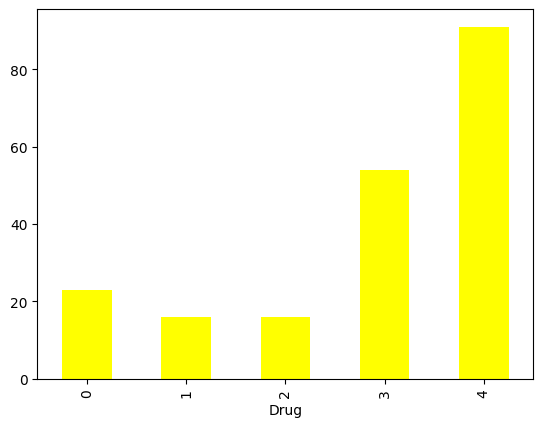

In [23]:
class_counts = data.groupby('Drug').size()
print(class_counts)
class_bar = class_counts.plot(kind = 'bar', color = 'yellow')

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix,recall_score,classification_report
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", matrix)
class_report = classification_report(y_test , y_pred)
print(class_report)

Confusion matrix: 
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  2  3  0]
 [ 0  0  0 11  0]
 [ 1  0  0  0 14]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         3
           2       1.00      0.40      0.57         5
           3       0.79      1.00      0.88        11
           4       1.00      0.93      0.97        15

    accuracy                           0.90        40
   macro avg       0.93      0.87      0.87        40
weighted avg       0.92      0.90      0.89        40



# **Over sampling on training set**

In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print("Before oversampling: ", Counter(y_train))
SMOTE = SMOTE()
X_train, y_train = SMOTE.fit_resample(X_train, y_train)
print("After oversampling: ", Counter(y_train))

logit = LogisticRegression()
logit.fit(X_train, y_train)
pred_logit= logit.predict(X_test)
print("\n The confusion_matrix: \n", confusion_matrix(y_test, pred_logit))


Before oversampling:  Counter({4: 76, 3: 43, 0: 17, 1: 13, 2: 11})
After oversampling:  Counter({3: 76, 4: 76, 2: 76, 0: 76, 1: 76})

 The confusion_matrix: 
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 1  0  0  0 14]]


# **Importing all models**

In [33]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay,accuracy_score

In [36]:
from imblearn.over_sampling import SMOTE
pipelines = []
pipelines.append(("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())])))
pipelines.append(("ScaledLDA", Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())])))
pipelines.append(("ScaledKNN", Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())])))
pipelines.append(("ScaledCART", Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())])))
pipelines.append(("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())])))
pipelines.append(("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC(max_iter = 300))])))
pipelines.append(("ScaledRF", Pipeline([("Scaler", StandardScaler()), ("RF", RandomForestClassifier())])))
pipelines.append(("ScaledEF", Pipeline([("Scaler", StandardScaler()), ("EF", ExtraTreesClassifier())])))
pipelines.append(("ScaledGB", Pipeline([("Scaler", StandardScaler()), ("GB", GradientBoostingClassifier())])))
pipelines.append(("ScaledXG", Pipeline([("Scaler", StandardScaler()), ("XG", xgb.XGBClassifier())])))

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

SMOTE = SMOTE()
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("confusion_matrix ",name ,"is:\n", confusion_matrix(y_test, y_pred))
    print(30*"-")

confusion_matrix  LR is:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 1  0  0  0 14]]
------------------------------
confusion_matrix  LDA is:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  1 10  0]
 [ 2  1  1  0 11]]
------------------------------
confusion_matrix  KNN is:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 1  0  0 10  0]
 [ 1  1  0  2 11]]
------------------------------
confusion_matrix  CART is:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
------------------------------
confusion_matrix  NB is:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 1  1  1  0 12]]
------------------------------
confusion_matrix  SVM is:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
------------------------------
confusion_matrix  RF is:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  

# **As we see perfect Models are XGboost , Randomforest , Svm and DecisionTree**